In [16]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

data_path = "../data/sgdm_wbn"
image_path = "./images/sgdm_wbn"
os.makedirs(image_path,exist_ok=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Max test accuracy of Standard is 85.91% with lr 0.025
Max test accuracy of Norm_p1 is 85.86% with p 0.025
Max test accuracy of GCStdU_p1 is 85.73% with p 0.025
Max test accuracy of Norm is 86.08% with p 0.15000000000000002
Max test accuracy of GCStdU is 86.15% with p 0.15000000000000002
Max test accuracy of wd is 82.83% with lambda 0.0020000000000000005


FileNotFoundError: [Errno 2] No such file or directory: '/home/miri/Documents/bachelorthesis/plots/images/sgdm_wbn/setting_hyperparameter_max_accuracy.png'

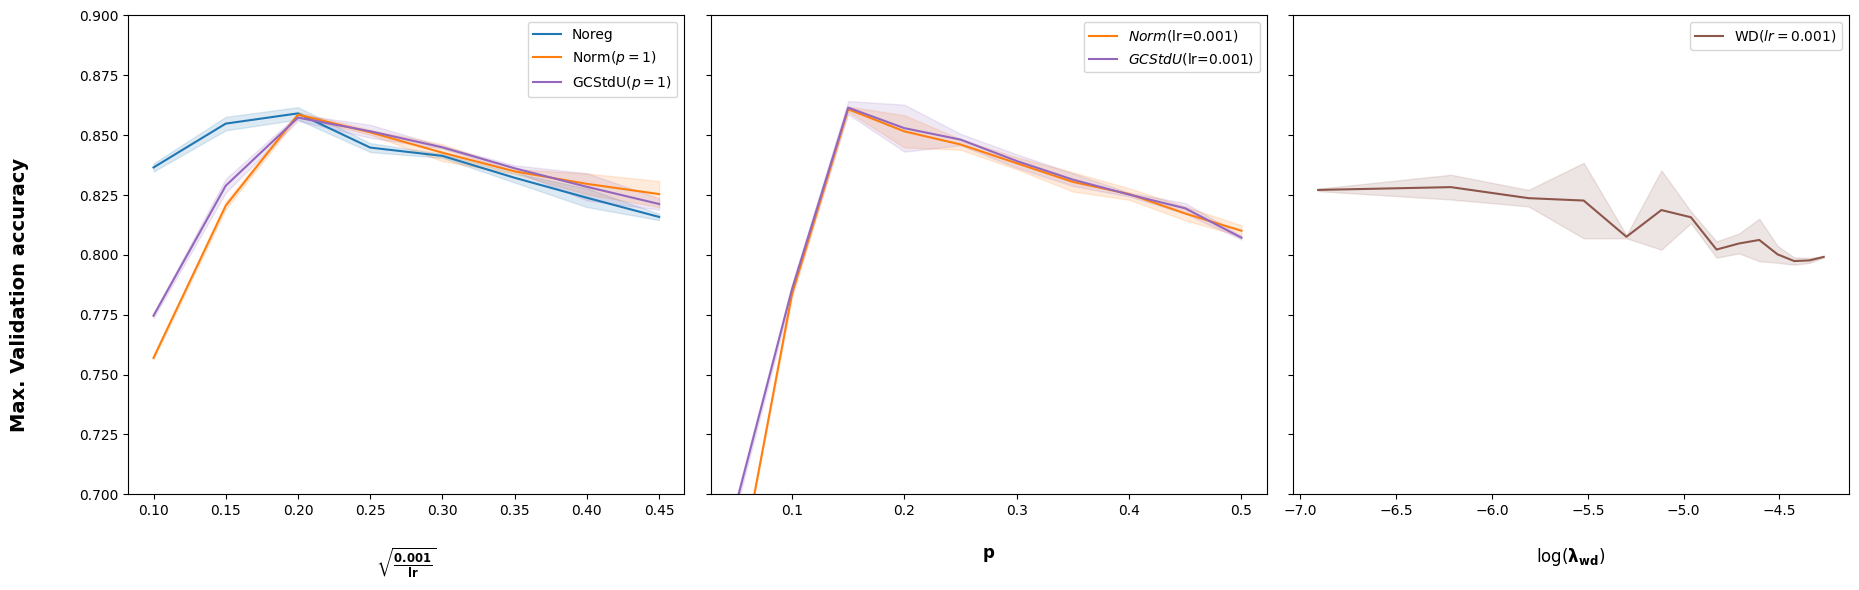

In [3]:
plot_wbn_setting_hyperparam_max_acc(data_path,image_path,["Norm_p1","GCStdU_p1"],["Norm","GCStdU"])

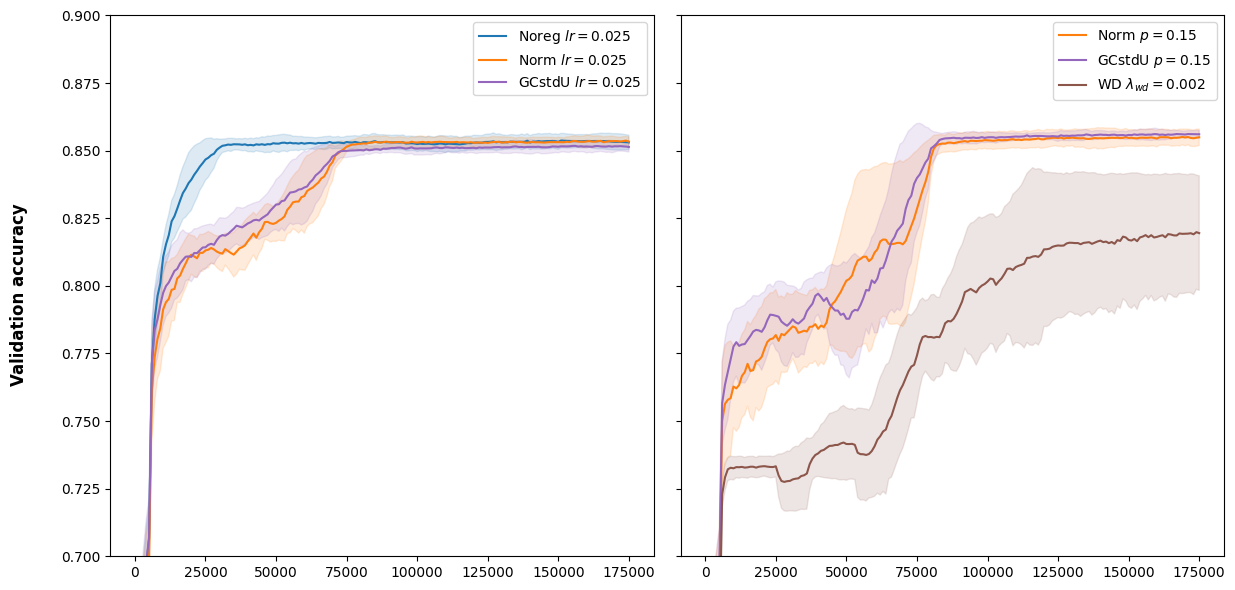

In [18]:
plot_wbn_best_hyperparameter_validation_curve(data_path,image_path,
                                              ["noreg/0.025","norm_p1/0.025","gcstdu_p1/0.025","norm/0.15_1","gcstdu/0.15_1","wd/0.002"],
                                              [r"Noreg $lr = 0.025$", r"Norm $lr=0.025$",r"GCstdU $lr=0.025$", r"Norm $p=0.15$",r"GCstdU $p=0.15$",r"WD $\lambda_{wd}=0.002$"],
                                              ["noreg","norm","gcstdu","norm","gcstdu","wd"],
                                              3,500000)

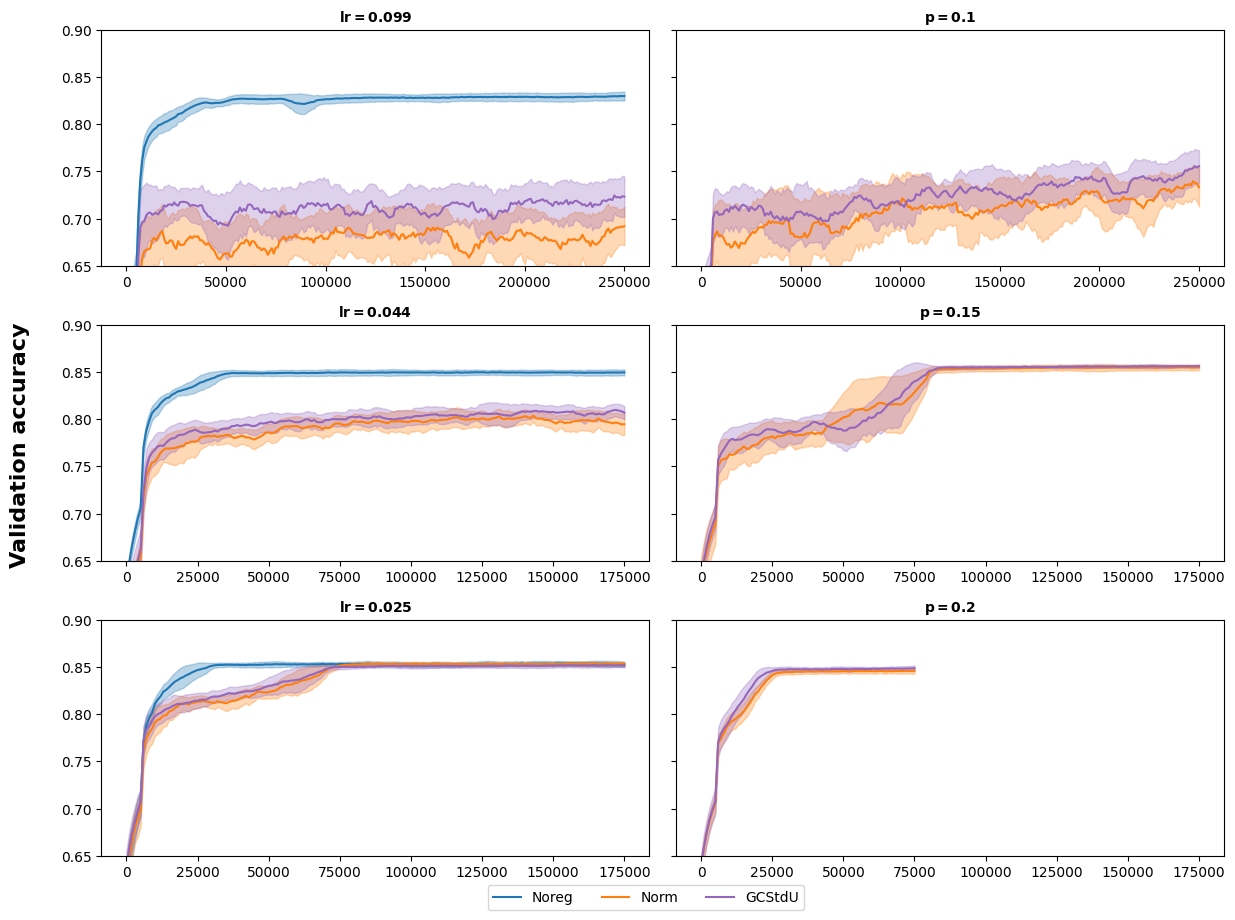

In [11]:
lrp = [("0.099","0.1"),("0.044","0.15"),("0.025","0.2")]

fig,axs = plt.subplots(ncols=2,nrows=len(lrp),sharey="all",sharex="row")

for i,(lr,p) in enumerate(lrp):
    stats = get_stats(f"{data_path}/noreg/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="Noreg",color=colors["noreg"],smoothing=5)

    stats = get_stats(f"{data_path}/norm_p1/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="Norm",color=colors["norm"],smoothing=5)

    stats = get_stats(f"{data_path}/gcstdu_p1/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="GCStdU",color=colors["gcstdu"],smoothing=5)

    stats = get_stats(f"{data_path}/norm/{p}_1","test_stats")
    plot_step_stat(stats["acc"],axs[i][1],label="Norm",color=colors["norm"],smoothing=5)

    stats = get_stats(f"{data_path}/gcstdu/{p}_1","test_stats")
    plot_step_stat(stats["acc"],axs[i][1],label="GCStdU",color=colors["gcstdu"],smoothing=5)

    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.025), bbox_transform=fig.transFigure)
fig.set_size_inches(12,9)
fig.tight_layout()
fig.savefig(f"{image_path}/lr_vs_p.png", bbox_inches='tight',dpi=1200)

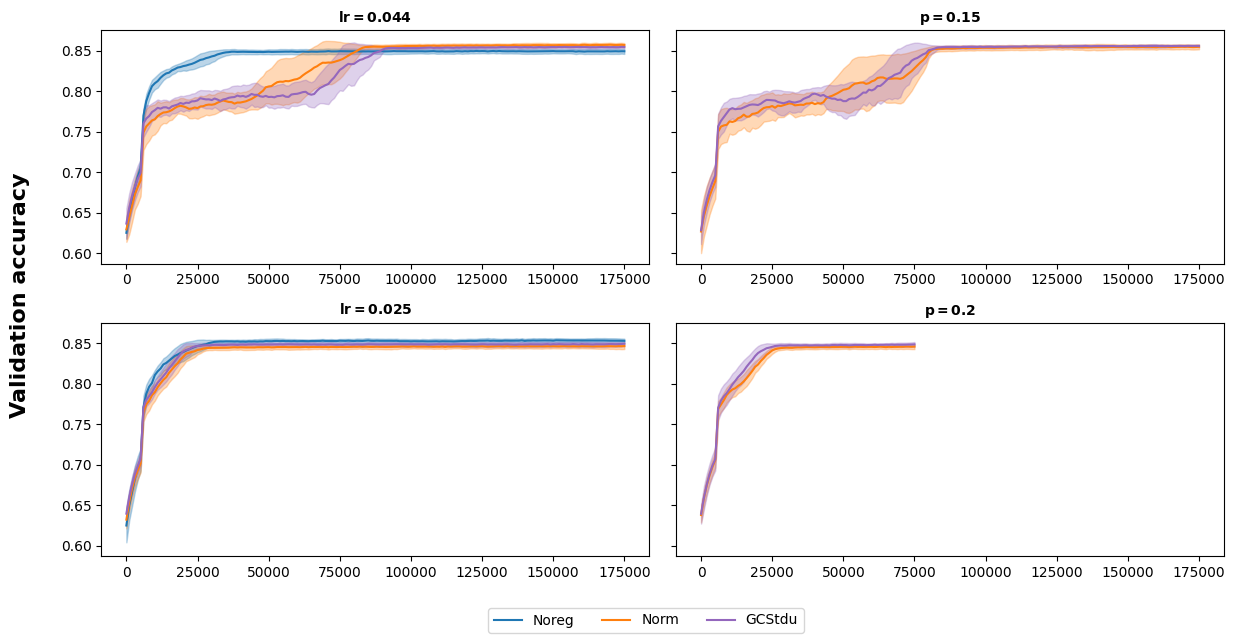

In [17]:
lrp = [("0.044","0.15"),("0.025","0.2")]

fig,axs = plt.subplots(ncols=2,nrows=len(lrp),sharey="all",sharex="row")

for i,(lr,p) in enumerate(lrp):
    stats = get_stats(f"{data_path}/noreg/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="Noreg",color=colors["noreg"],smoothing=5)

    stats = get_stats(f"{data_path}/norm_p1_lrfix/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="Norm",color=colors["norm"],smoothing=5)

    stats = get_stats(f"{data_path}/gcstdu_p1_lrfix/{lr}","test_stats")
    plot_step_stat(stats["acc"],axs[i][0],label="GCStdu",color=colors["gcstdu"],smoothing=5)

    stats = get_stats(f"{data_path}/norm/{p}_1","test_stats")
    plot_step_stat(stats["acc"],axs[i][1],label="Norm",color=colors["norm"],smoothing=5)

    stats = get_stats(f"{data_path}/gcstdu/{p}_1","test_stats")
    plot_step_stat(stats["acc"],axs[i][1],label="GCStdU",color=colors["gcstdu"],smoothing=5)

    axs[i][0].set_title(fr"$\mathbf{{lr={lr}}}$",font={'weight' : 'bold'})
    axs[i][1].set_title(fr"$\mathbf{{p={p}}}$",font={'weight' : 'bold'})
    #axs[i][1].set_ylim(0.65,0.9) 

fig.text(-0.03, 0.5, "Validation accuracy", va='center', rotation='vertical',font={'size'   : 16,'weight' : 'bold'})

lines, labels = axs[0][0].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
fig.set_size_inches(12,6)
fig.tight_layout()
fig.savefig(f"{image_path}/lr_vs_p_corrected.png", bbox_inches='tight',dpi=1200)

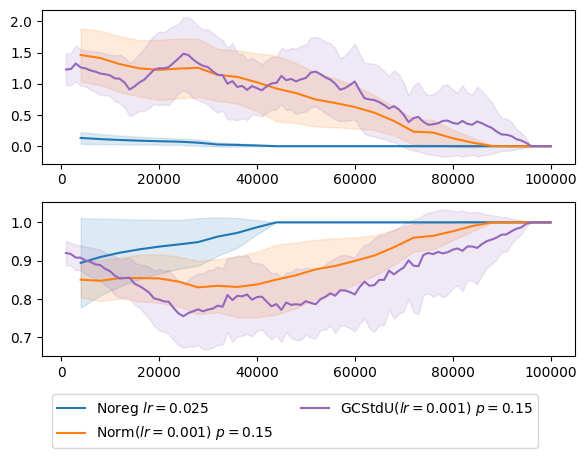

In [13]:
fig,axs = distribution_drift(data_path,["noreg/0.025","norm/0.15_1","gcstdu/0.15_1"],
                             [r"Noreg $lr=0.025$","Norm($lr=0.001$) $p=0.15$","GCStdU($lr=0.001$) $p=0.15$"],
                             [colors["noreg"],colors["norm"],colors["gcstdu"]])

fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/ics.png", bbox_inches='tight',dpi=1200)

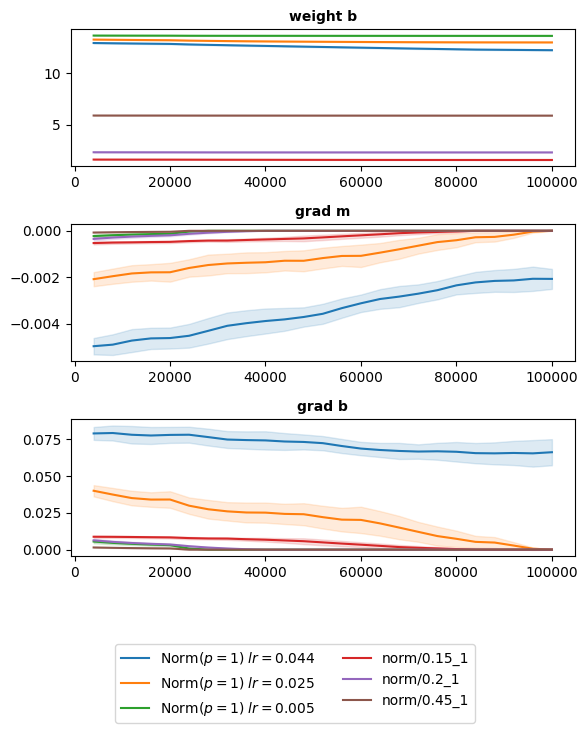

In [14]:
exps = ["norm_p1/0.044","norm_p1/0.025","norm_p1/0.005","norm/0.15_1","norm/0.2_1","norm/0.45_1"]
labels = [r"Norm($p=1$) $lr = 0.044$", r"Norm($p=1$) $lr = 0.025$", r"Norm($p=1$) $lr = 0.005$","norm/0.15_1","norm/0.2_1","norm/0.45_1"]
colors = dict(zip(labels, sns.color_palette("tab10", len(labels))))
fig,axs = mg_spacing(data_path,exps,labels,colors,"mg_spacing_0")

fig.set_size_inches(6,6)
fig.tight_layout()
